In [1]:
import numpy as np
import random
import cPickle
import gzip
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import network4

import csv

In [2]:
"""
Class for handling the filenames of each of the files 
needed for the implementation of the neural network, 
and also for reading the input and parsed data files.
"""

class FileHandler(object):

    def __init__(self, input_filename, parsed_data_filename, test_data_filename, parsed_test_data_filename):
        self.input_filename = input_filename
        self.parsed_data_filename = parsed_data_filename
        self.test_data_filename = test_data_filename
        self.parsed_test_data_filename = parsed_test_data_filename

    def get_input_data(self):
        """A generator of the input data"""
        with open(self.input_filename, "rb") as csvfile:
            datareader = csv.reader(csvfile)
            for row in datareader:
                yield row
    
    def get_test_data(self):
        """A generator of the test data"""
        with open(self.test_data_filename, "rb") as csvfile:
            datareader = csv.reader(csvfile)
            for row in datareader:
                yield row
    
    def get_parsed_data(self):
        """A generator of the parsed data"""
        with open(self.parsed_data_filename, "rb") as csvfile:
            datareader = csv.reader(csvfile)
            for row in datareader:
                yield row
    
    def get_parsed_test_data(self):
        """A generator of the parsed test data"""
        with open(self.parsed_test_data_filename, "rb") as csvfile:
            datareader = csv.reader(csvfile)
            for row in datareader:
                yield row
                
    def get_parsed_data_filename(self):
        return self.parsed_data_filename
    
    def get_parsed_test_data_filename(self):
        return self.parsed_test_data_filename

In [3]:
"""
Various functions for loading and showing the data.
"""

def print_sample(data):
    count = 0
    for row in data:
        print row
        count += 1
        if (count > 10):
            break
            
def get_binary_categories_vector(input_category):
    categories_vector = [0] * 39
    categories_vector[input_category] = 1
    return categories_vector

def get_train_xy(row):
    x = []
    x += row[0:-1]
    input_dim = len(x)
    x = np.asarray(x)
    x = np.reshape(x, (input_dim, 1))
    y = get_binary_categories_vector(int(row[-1]))
    output_dim = len(y)
    y = np.asarray(y)
    y = np.reshape(y, (output_dim, 1))
    return (x, y)
      
def get_evaluation_xy(row):
    x = []
    x += row[0:-1]
    input_dim = len(x)
    x = np.asarray(x)
    x = np.reshape(x, (input_dim, 1))
    y = row[-1]
    return (x, y)

def get_test_row(input_row):
    row = []
    dim = len(input_row)
    row = np.asarray(input_row)
    row = np.reshape(row, (dim, 1))
    return row

def load_data(file_handler):
    data_generator = file_handler.get_parsed_data()
    train_data = []
    evaluation_data = []
    validation_data = []
    count = 0
    for row in data_generator:
        row = map(float, row)
        row[-1] = int(row[-1])
        if (count < 8):
            train_data.append(get_train_xy(row))
            count += 1
        elif(count == 8):
            evaluation_data.append(get_evaluation_xy(row))
            count += 1
        else:
            validation_data.append(get_evaluation_xy(row))
            count = 0
    return (train_data, evaluation_data, validation_data)

def load_test_data(file_handler):
    data_generator = file_handler.get_parsed_test_data()
    test_data = []
    for row in data_generator:
        row = map(float, row)
        test_data.append(get_test_row(row))
    return test_data

# Creation of the File Handler

In [4]:
input_filename = '../data/train.csv'
parsed_data_filename = '../data/parsed_train.csv'
test_data_filename = '../data/test.csv'
parsed_test_data_filename = '../data/parsed_test.csv'

file_handler = FileHandler(input_filename, parsed_data_filename, test_data_filename, parsed_test_data_filename)

# Data load
The parsed data has to be generated prior to loading the data

In [5]:
training_data, evaluation_data, validation_data = load_data(file_handler)

# Data samples (for debugging)

In [ ]:
print_sample(training_data)
print_sample(evaluation_data)
print_sample(validation_data)


# Load Neural Network from file

In [ ]:
net = network4.load("../data/net-with-intersec-and-addr-type")

# Creation of the Neural Network

In [6]:
input_dim = len(training_data[0][0])
output_dim = len(training_data[0][1])

print input_dim
print output_dim

43
39


In [7]:
net = network4.Network([input_dim, 80, output_dim], cost=network4.CrossEntropyCost)
net.default_weight_initializer()

# SGD Algorithm with the loaded data

In [8]:
net.SGD(training_data, 5, 100, 0.5, lmbda = 0.1, evaluation_data=evaluation_data, 
            monitor_evaluation_cost=True,
            monitor_evaluation_accuracy=True,
            monitor_training_cost=False,
            monitor_training_accuracy=False)


delta nabla b:  [array([[-0.        ],
       [-0.0868466 ],
       [-0.06926969],
       [ 0.05523211],
       [ 0.        ],
       [ 0.03435209],
       [ 0.        ],
       [ 0.        ],
       [ 0.0498665 ],
       [ 0.        ],
       [ 0.0743376 ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.13459162],
       [ 0.24652385],
       [-0.01211034],
       [ 0.00695501],
       [ 0.        ],
       [ 0.03149003],
       [-0.05028099],
       [ 0.01520664],
       [ 0.        ],
       [ 0.        ],
       [-0.        ],
       [ 0.        ],
       [ 0.        ],
       [-0.11483404],
       [-0.01074839],
       [-0.        ],
       [ 0.        ],
       [ 0.        ],
       [-0.        ],
       [ 0.        ],
       [-0.        ],
       [ 0.1289067 ],
       [-0.0838222 ],
       [ 0.00398373],
       [-0.        ],
       [ 0.07649552],
       [-0.        ],
       [ 0.        ],
       [ 0.22616311],
       [ 0.    

KeyboardInterrupt: 

# Test of the network with the validation data

In [ ]:
result = net.accuracy(validation_data)
cost = net.total_cost(validation_data, 0.1, convert=True)
print result, " / ", len(validation_data)
print cost

# Save network to file

In [ ]:
net.save("../data/net-7")

# Compare network results

In [ ]:
def compare_results(epochs1, costs1, epochs2, costs2):
    
    print "---Network 1--- (Blue)"
    print ""
    print "Max cost:", max(costs1)
    print "Min cost:", min(costs1)
    print ""
    print "Max epoch:", max(epochs1)
    print "Min epoch:", min(epochs1)
    print ""
    print ""
    
    print "---Network 2--- (Green)"
    print ""
    print "Max cost:", max(costs2)
    print "Min cost:", min(costs2)
    print ""
    print "Max epoch:", max(epochs2)
    print "Min epoch:", min(epochs2)
    print ""
    print ""
    
    plt.figure(1)
    plt.subplot()
    plt.plot(costs1)
    plt.plot(costs2)

    plt.figure(2)
    plt.subplot()
    plt.plot(epochs1)
    plt.plot(epochs2)

In [ ]:
epochs1 = []


costs1 = []



epochs2 =   []


costs2 = []


compare_results(epochs1, costs1, epochs2, costs2)

# Graph Epoch results and Costs

Max cost: 8
Min cost: 3

Max epoch: 4
Min epoch: 1




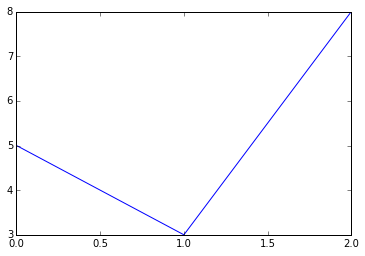

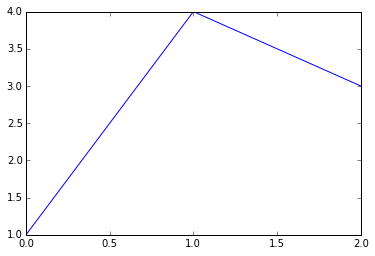

In [14]:
epochs = [
    
]

costs = [

]
    
print "Max cost:", max(costs)
print "Min cost:", min(costs)
print ""
print "Max epoch:", max(epochs)
print "Min epoch:", min(epochs)
print ""
print ""
    
    
plt.figure(1)
plt.subplot()
plt.plot(costs)

plt.figure(2)
plt.subplot()
plt.plot(epochs)

# Load test data

In [ ]:
test_data = load_test_data(file_handler)

In [ ]:
print_sample(test_data)

# Evaluate test data

In [ ]:
net.evaluate(test_data, 
        probabilities_results_filename = "../data/probabilities-results.csv", 
        binary_results_filename = "../data/binary-results.csv", 
        save_probabilities_results = True, 
        save_binary_results = True)

In [ ]:
results = [  2.73403460e-03,
   1.06747160e-01,
   2.44149804e-05,
   3.11745872e-04,
   4.70809244e-02,
   1.03016607e-03,
   5.45880934e-03,
   1.80150356e-02,
   6.54449959e-03,
   2.30040658e-04,
   7.93228733e-05,
   6.68143807e-04,
   1.16685797e-03,
   7.91125651e-03,
   7.52419816e-05,
   5.53447923e-03,
   1.45430918e-01,
   1.44252878e-03,
   3.62152256e-05,
   6.43539528e-02,
   1.03787255e-01,
   1.06346123e-01,
   6.51379203e-06,
   2.21686150e-04,
   3.05608473e-03,
   3.38171330e-02,
   4.91995578e-03,
   2.54509980e-02,
   8.26578435e-03,
   9.68745739e-05,
   6.73256898e-03,
   2.61935894e-04,
   3.99926923e-02,
   7.98744999e-05,
   6.49537631e-03,
   9.11290015e-02,
   8.87539845e-02,
   4.88677840e-02,
   1.68426259e-02]

print max(results)
print sum(results)

In [13]:
def relu(z):
    """The ReLu function."""
    return z * (z > 0)

def relu_prime(z):
    """Derivative of the ReLu function."""
    return (np.sign(z) + 1) / 2

def softmax(z):
    """The softmax function."""
    exp_z = np.exp(z)
    return exp_z/np.sum(exp_z)

def delta(a, y):
    """Return the error delta from the output layer.  Note that the
    parameter ``z`` is not used by the method.  It is included in
    the method's parameters in order to make the interface
    consistent with the delta method for other cost classes.

    """
    return (a-y)


a = np.array([1, -2, 3, 0, -3, 6, 0])
y = np.array([0, 0, 0, 0, 0, 1, 0])

print relu(a)
print ""
print relu_prime(a)
print ""
print softmax(a)
print ""
print delta(a, y)




[1 0 3 0 0 6 0]

[1 0 1 0 0 1 0]

[  6.34493302e-03   3.15895614e-04   4.68830660e-02   2.33417041e-03
   1.16211502e-04   9.41671553e-01   2.33417041e-03]

[ 1 -2  3  0 -3  5  0]
